In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

# Question 2

## Part a

In [77]:
def calc_hist(image):
    '''
    Do not use libraries
    calculate image histogram
    input(s):
      image (ndarray): input image
    output(s):
      hist (ndarray): computed input image histogram
    '''

    hist = np.zeros(256,dtype=int)
    
    unique, count = np.unique(image, return_counts=True)
    color_count = dict(zip(unique, count))
    # set value of count 256 color 
    for i in range(256):
        hist[i] = color_count.get(i, 0)

    return hist


In [78]:
def calc_cdf(channel):
    '''
    Do not use libraries
    calculate image cdf
    input(s):
      channel (ndarray): input image channel
    output(s):
      cdf (ndarray): computed cdf for input image channel
    '''
    
    # calculate hist of the channel
    hist = calc_hist(channel)
    
    # create probability of all pixel
    probability = hist / hist.sum()
    
    cdf = probability.cumsum()
    
    return cdf


In [79]:
def hist_matching(src_image,ref_image):
    '''
    don't use libraries
    input(s):
    src_image (ndarray): source image
    ref_image (ndarray): reference image
    output(s):
    output_image (ndarray): transformation of source image so that its histogram matches histogram of refrence image
    '''
    output_image = src_image.copy()
    channels = [(0, 'Blue channel'), (1, 'Green channel'), (2, 'Red channel')]
    for channel, title in channels:
        
        # calculate cdf of ref and source image with round of 2 decimal 
        cdf_of_reference = np.round( calc_cdf(ref_image[:,:,channel]),decimals=2 ) 
        cdf_of_source = np.round( calc_cdf(output_image[:,:,channel]),decimals=2)
        
        # convert src image pixel to ref pixel based on their cdf
        pixel = cdf_of_reference.searchsorted(cdf_of_source)
        
        # change pixel of src to what we got above
        f = lambda x : pixel[x]
        output_image[:,:,channel] = np.vectorize(f)(output_image[:,:,channel])

        
    return output_image
 

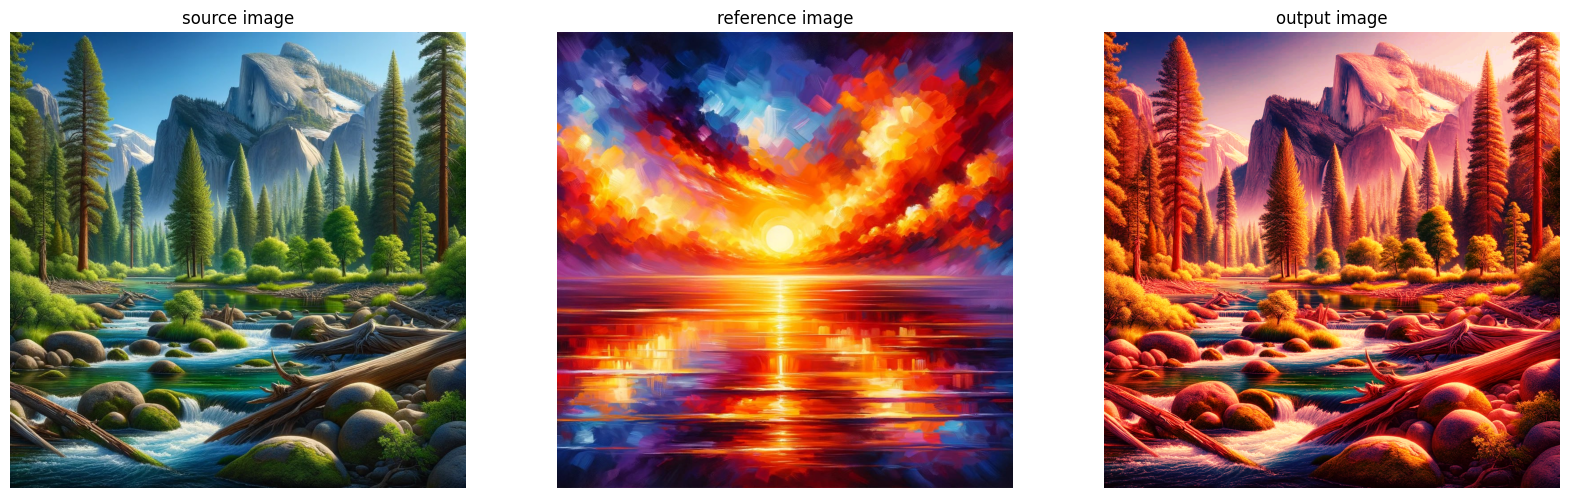

In [80]:
# Do not change this cell
src = cv2.imread('src.png')
ref = cv2.imread('ref.png')
Array = [src, ref, hist_matching(src,ref)]
titles = ['source image', 'reference image', 'output image']
plt.figure(figsize=(20,20))
for i in range(3):
  plt.subplot(1,3,i+1)
  plt.imshow(Array[i][:,:,::-1])
  plt.title(titles[i])
  plt.axis('off')

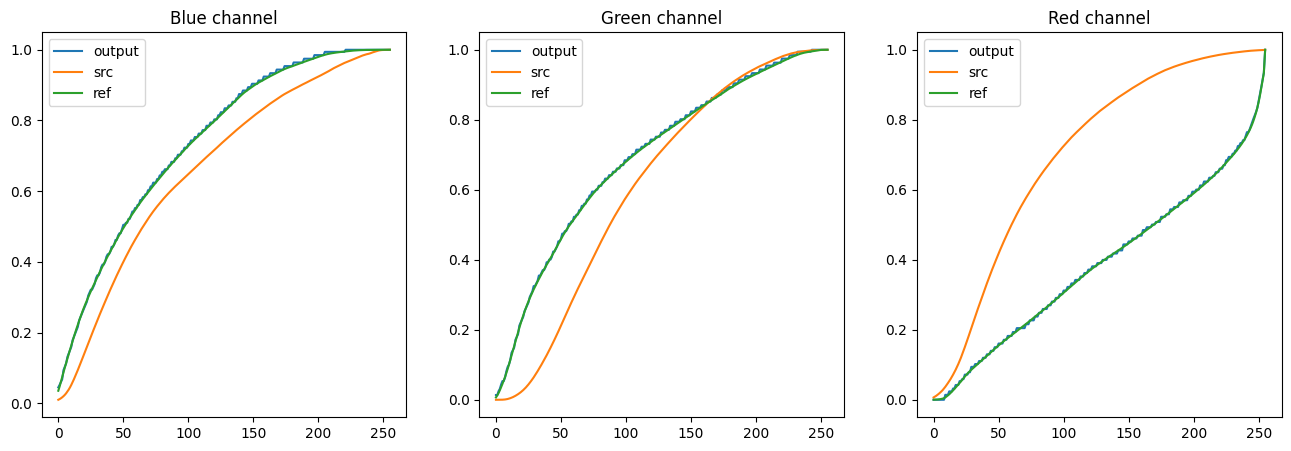

In [81]:
# Do not change this cell
fig = plt.figure(figsize= (16, 5))
channels = [(0, 'Blue channel'), (1, 'Green channel'), (2, 'Red channel')]
output = hist_matching(src,ref)
for channel, title in channels:
    fig.add_subplot(1, 3, channel+ 1)
    a = calc_cdf(output[:,:,channel])
    b = calc_cdf(src[:,:,channel])
    c = calc_cdf(ref[:,:,channel])
    plt.plot(a,label='output')
    plt.plot(b,label='src')
    plt.plot(c,label='ref')
    plt.legend()
    plt.title(title)